# Loading data for AHU systems

In [1]:
from source.helperfunctions import *
from source.dataGenerator import *
from source.predictionmodel import *

In [2]:
def customdf_ahu(ahupath, ahu, savepath, metasysdata, limit=0.1):
    # read the relevant data
    data_path = [ahupath+'/BdXdata/', ahupath+'/Solcastdata/', ahupath+'/valvedata/']
    date_column_name = ['Date', 'PeriodEnd', 'Time']
    date_format = ['%m/%d/%Y %H:%M', '%Y-%m-%dT%H:%M:%SZ', None]
    outlier_names = [['AirFlow', 'CC_T', 'OAT', 'PH_T.', 'SAT'], [], []]
    time_offsets = [0, 0, 0]
    # Create the data frame
    df = createdataframe(data_path, date_column_name, date_format, outlier_names, time_offsets,
                         metasysdata, limit=limit)
    # drop solcast air temp and dew point
    df.drop(columns=['AirTemp', 'DewpointTemp'], inplace=True)
    # rename columns: maintain order of variables correctly
    namedict = {'OAT': 'OAT',
                'AirTemp': 'OAT',
                'SAT': 'SAT',
                'SAT_STP': 'SAT_STP',
                'AirFlow': 'AirFlow',
                'PHT_STP': 'PHT_STP',
                'CCT_STP': 'CCT_STP',
                'PH_T.': 'PH_T',
                'CC_T': 'CC_T',
                'RelativeHumidity': 'RH',
                'AHU_2.preheatOutput': 'P_OP',
                'AHU_2.coolOutput': 'C_OP',
                'AHU_2.heatOutput': 'R_OP',
                'Preheat Output.Preheat Output.Trend - Present Value ()': 'P_OP',
                'Chilled Water Valve Ouptut.Chilled Water Valve Ouptut.Trend - Present Value ()': 'C_OP',
                'Reheat Output.Reheat Output.Trend - Present Value ()': 'R_OP',
                'DewpointTemp': 'DP'}
    # df.columns = ['OAT', 'SAT', 'SAT_STP', 'AirFlow', 'PHT_STP', 'CCT_STP',
    #               'PH_T', 'CC_T', 'RH', 'P_OP', 'C_OP', 'R_OP']
    df.columns = [namedict[i]+ahu for i in df.columns]

    # save the data frame
    dfsave(df, savepath)

In [3]:
# params
ahu1 = 'ahu1'
ahu2 = 'ahu2'
metasysdataahu1 = [False, False, True]
metasysdataahu2 = [False, False, False]

In [4]:
# create custom dataframes
customdf_ahu('./data/ahu1', ahu1, 'hybrid_data_ahu1.pkl', metasysdataahu1, limit=0.1)
customdf_ahu('./data/ahu2', ahu2, 'hybrid_data_ahu2.pkl', metasysdataahu2, limit=0.5)

In [5]:
df1 = read_pickle('hybrid_data_ahu1.pkl')
df2 = read_pickle('hybrid_data_ahu2.pkl')

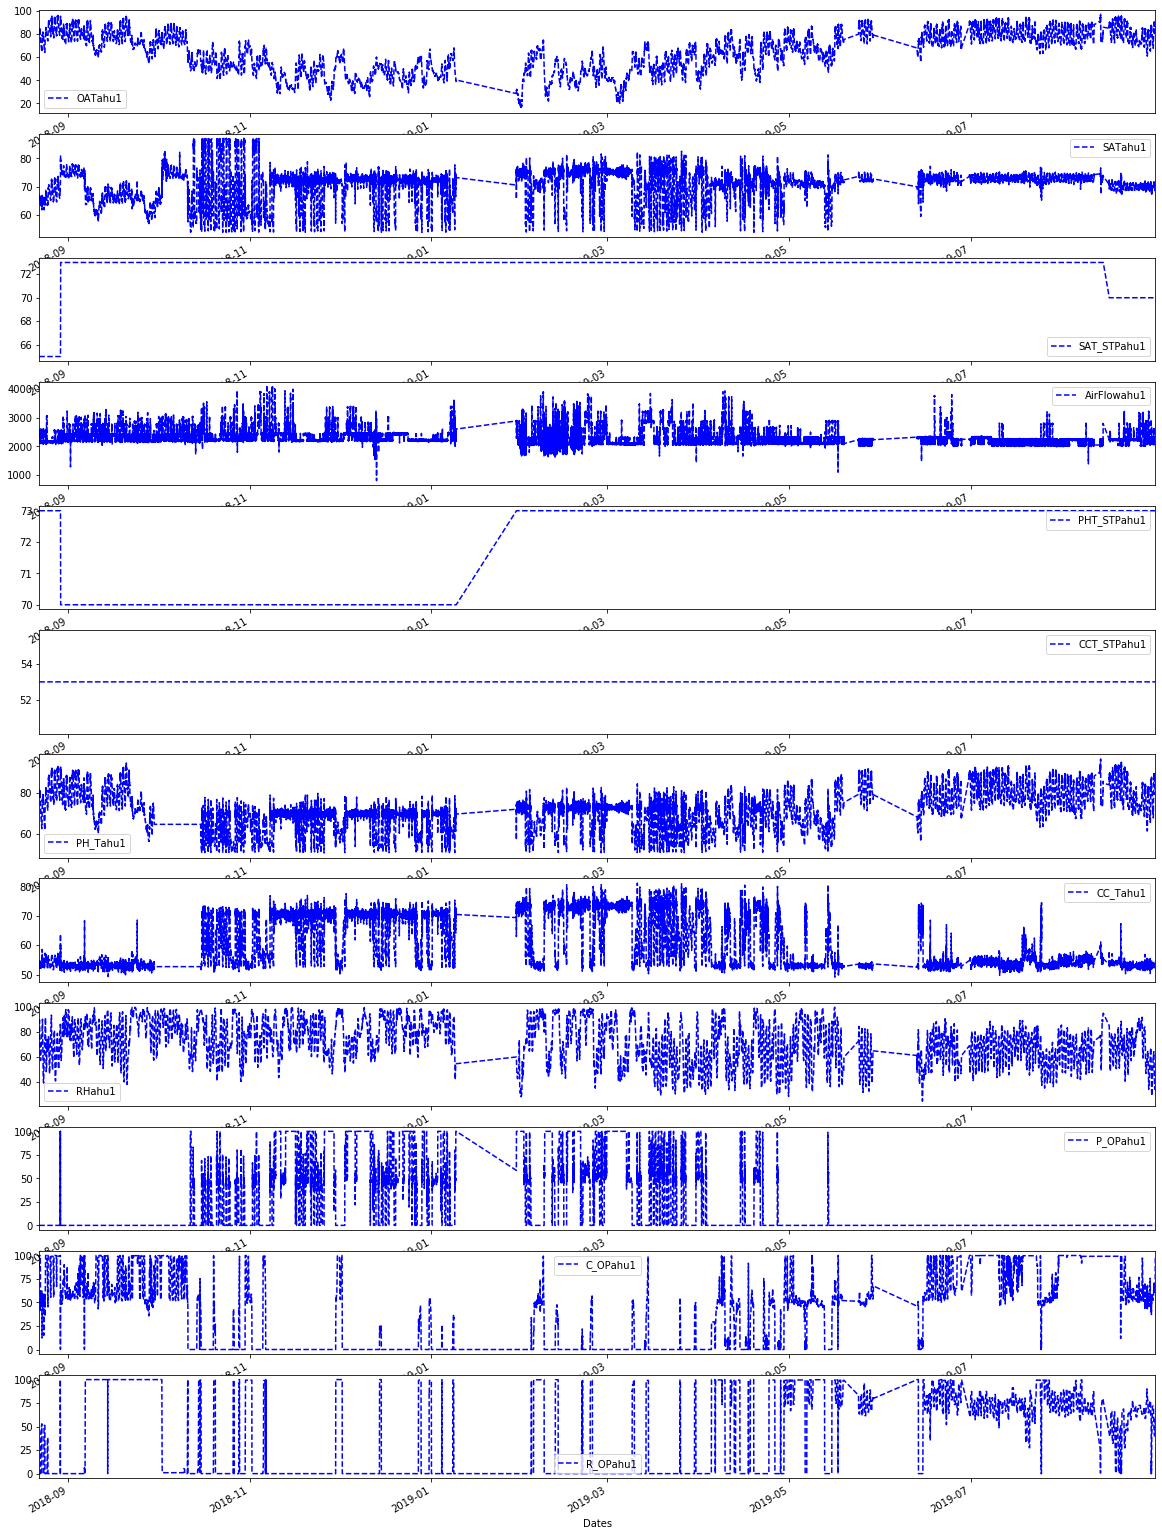

In [11]:
datainspect(df1)

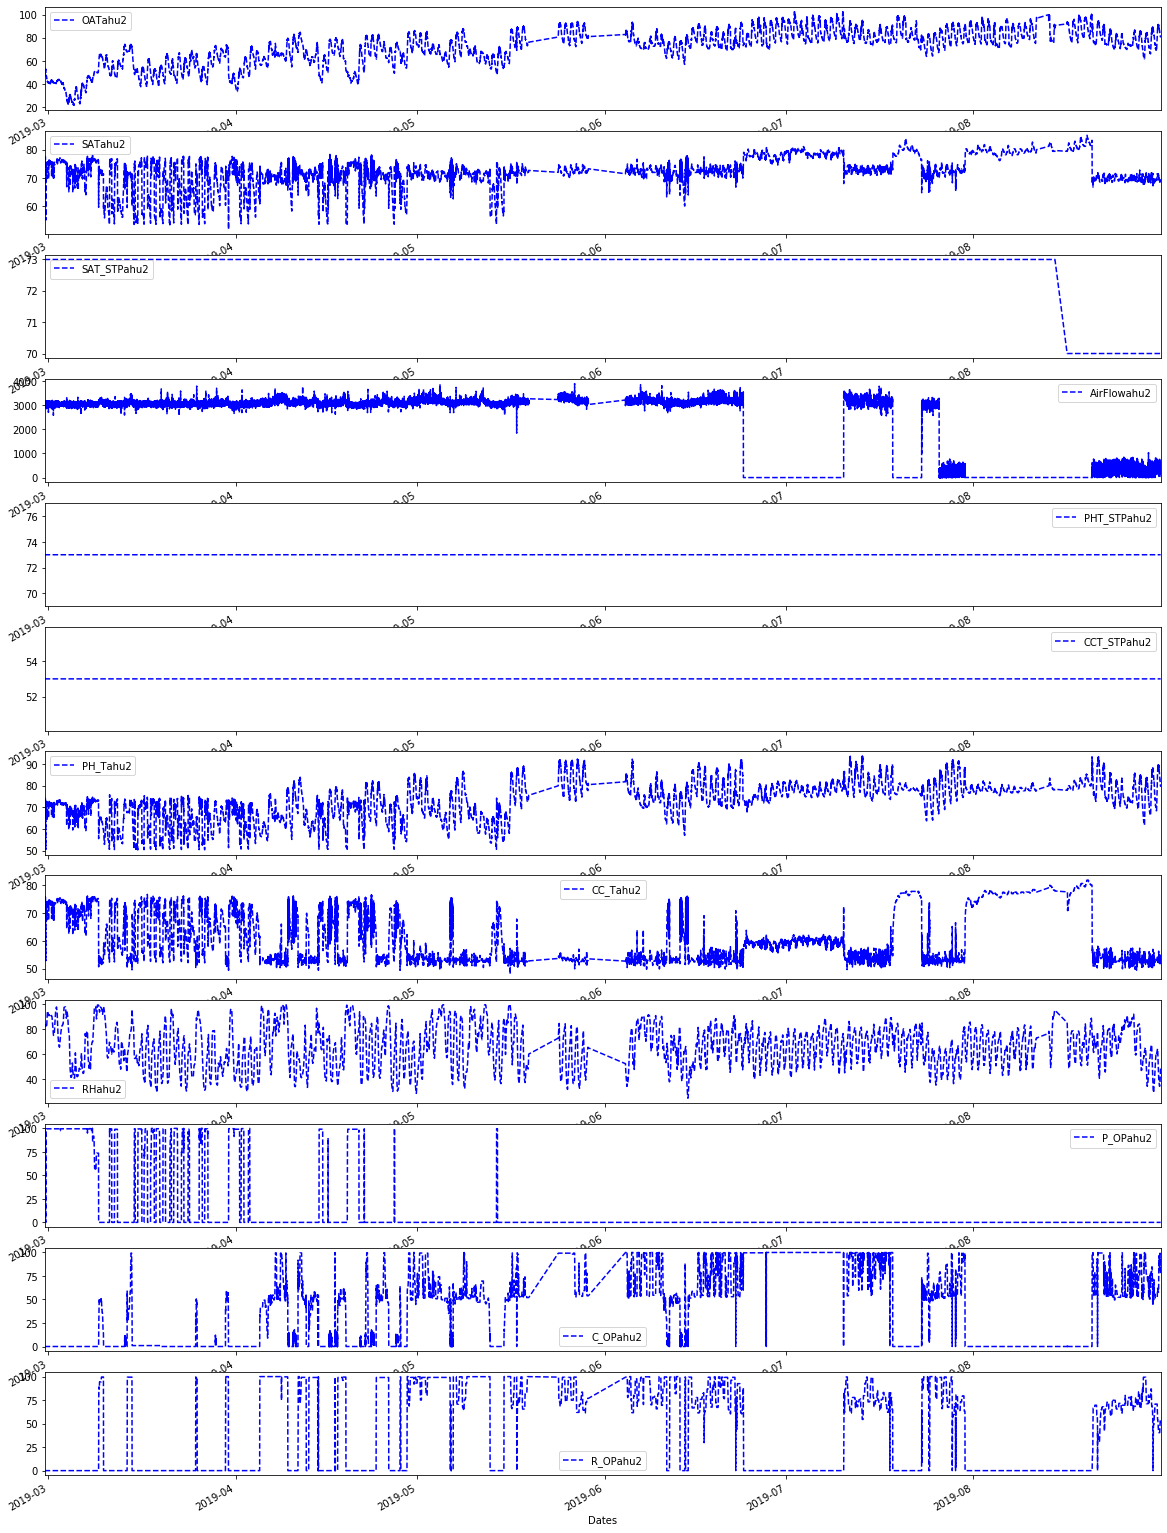

In [12]:
datainspect(df2)

In [13]:
# remove old results files from "Results" Folder
removeoldresults('ResultsAHU1')
removeoldresults('ResultsAHU2')

In [14]:
# learn function for estimating recovery heat air temperature for AHU 1
X_train, X_test, y_train, y_test = recovheatdata(df1, ahu1)
model = GBR_model(modeltype='Recovery Heat Temp', period=1, savepath='ResultsAHU1')
model.trainmodel(X_train, X_test, y_train, y_test, savemodel=True)

In [15]:
# learn function for estimating pre cool air temperature for AHU 1
X_train, X_test, y_train, y_test = precooldata(df1, ahu1)
model = GBR_model(modeltype='PreCool Temp', period=1, savepath='ResultsAHU1')
model.trainmodel(X_train, X_test, y_train, y_test, savemodel=True)

In [16]:
# learn function for estimating recovery heat air temperature for AHU 2
X_train, X_test, y_train, y_test = recovheatdata(df2, ahu2)
model = GBR_model(modeltype='Recovery Heat Temp', period=1, savepath='ResultsAHU2')
model.trainmodel(X_train, X_test, y_train, y_test, savemodel=True)

In [17]:
# learn function for estimating pre cool air temperature for AHU 2
X_train, X_test, y_train, y_test = precooldata(df2, ahu2)
model = GBR_model(modeltype='PreCool Temp', period=1, savepath='ResultsAHU2')
model.trainmodel(X_train, X_test, y_train, y_test, savemodel=True)

## Learning condenser loop nergy consumption

In [13]:
# learn the necessary driven models from the provided data
def customdf_condensor(savepath='condensordata.pkl', metasysdata=[False], limit=0.1):
    # read the relevant data
    data_path = ['./data/condensor/']
    date_column_name = ['Date']
    date_format = ['%m/%d/%Y %H:%M']
    outlier_names = [['Alumni_Hall_Cond_Loop_S_T.value',
                     'Alumni_Hall_Cond_Loop_R_T.value']]
    time_offsets = [0]
    # Create the data frame
    df = createdataframe(data_path, date_column_name, date_format, outlier_names, time_offsets,
                         metasysdata, limit=limit)
    # drop solcast air temp and dew point
    # df.drop(columns=['Condensor_Water_Pump.pumpVfdPercent',
    #                 'Secondary_Chilled_Water_Pump.pumpVfdPercent'], inplace=True)
    # rename columns: maintain order of variables correctly
    namedict = {'OAT': 'OAT',
                'AirTemp': 'OAT',
                'SAT': 'SAT',
                'SAT_STP': 'SAT_STP',
                'AirFlow': 'AirFlow',
                'PHT_STP': 'PHT_STP',
                'CCT_STP': 'CCT_STP',
                'PH_T.': 'PH_T',
                'CC_T': 'CC_T',
                'RelativeHumidity': 'RH',
                'AHU_2.preheatOutput': 'P_OP',
                'AHU_2.coolOutput': 'C_OP',
                'AHU_2.heatOutput': 'R_OP',
                'Preheat Output.Preheat Output.Trend - Present Value ()': 'P_OP',
                'Chilled Water Valve Ouptut.Chilled Water Valve Ouptut.Trend - Present Value ()': 'C_OP',
                'Reheat Output.Reheat Output.Trend - Present Value ()': 'R_OP',
                'DewpointTemp': 'DP',
                'Alumni_Hall_Cond_Loop_R_T.value': 'CondRT',
                'Alumni_Hall_Cond_Loop_S_T.value': 'CondST',
                'Alumni_Hall_SCHW1_DP.value': 'Ahu1DP',
                'Alumni_Hall_SCHW2_DP.value': 'Ahu2DP',
                'Alumni_Hall_CU_DP.value': 'CuDP',
                'Alumni_Hall_PCHW_Flow.value': 'PchwFlow',
                'Condensor_Water_Pump.pumpVfdPercent': 'CondPump',
                'Secondary_Chilled_Water_Pump.pumpVfdPercent': 'SecPump'}
    df.columns = [namedict[i] for i in df.columns]

    # save the data frame
    dfsave(df, savepath)

In [14]:
# create custom dataframes
customdf_condensor()

In [44]:
df3 = read_pickle('condensordata.pkl')

In [52]:
df3.head()

,CondPump,SecPump,PchwFlow,CondST,CondRT,Ahu1DP,Ahu2DP,CuDP,totalheadahu,totalheadcondensor,totalheadhvac,flowrateahu,flowratecond,totalpump
Dates,,,,,,,,,,,,,,
2018-08-01 00:00:00,56.891563,71.45562,47.891895,58.631451,60.938881,12.709639,3.179518,6.951138,5.348178,2.636501,7.984679,32.078232,15.813664,128.347183
2018-08-01 00:05:00,56.891563,71.45562,48.301052,59.716423,62.018295,12.679482,3.197973,6.957159,5.349114,2.637643,7.986757,32.349531,15.951521,128.347183
2018-08-01 00:10:00,56.891563,71.45562,47.955593,59.381268,61.682381,12.676654,3.172354,6.958418,5.341539,2.637881,7.979420,32.102165,15.853428,128.347183
2018-08-01 00:15:00,56.891563,71.45562,48.616940,59.067101,61.340473,12.636952,3.204126,6.959249,5.344856,2.638039,7.982895,32.550917,16.066023,128.347183
2018-08-01 00:20:00,56.891563,71.45562,48.459042,59.759850,61.833065,12.675906,3.230599,6.945596,5.357711,2.635450,7.993161,32.481460,15.977581,128.347183


In [46]:
import numpy as np
df3['totalheadahu'] = np.sqrt(df3['Ahu1DP'])+np.sqrt(df3['Ahu2DP'])
df3['totalheadcondensor'] = np.sqrt(df3['CuDP'])
df3['totalheadhvac'] = df3['totalheadahu'] + df3['totalheadcondensor']
df3['flowrateahu'] = df3['PchwFlow']*df3['totalheadahu']/df3['totalheadhvac']
df3['flowratecond'] = df3['PchwFlow']*df3['totalheadcondensor']/df3['totalheadhvac']
# df3.drop(columns=['totalheadahu','totalheadcondensor','totalheadhvac'], inplace=True)

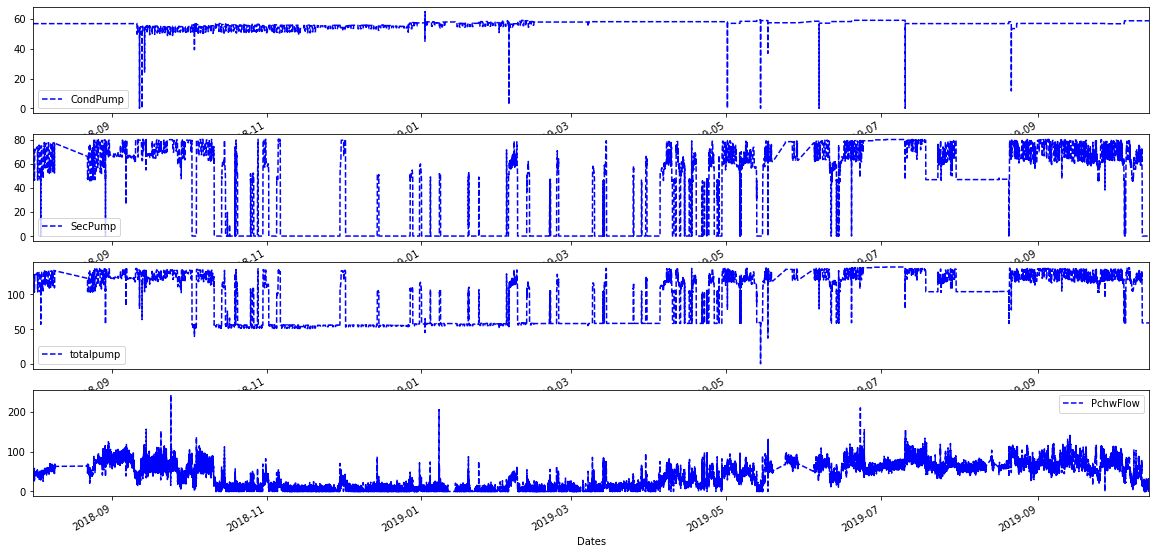

In [51]:
def datainspect(df):
    from matplotlib import pyplot as plt
    plt.rcParams["figure.figsize"] = (20,10)
    fig,ax = plt.subplots(df.shape[1],1)
    for i,j in zip(df.columns,range(df.shape[1])):
        df.plot(y=[i],ax=ax[j],style=['b--'])
df3['totalpump']=df3['CondPump']+df3['SecPump']
datainspect(df3[['CondPump','SecPump','totalpump','PchwFlow']])

In [ ]:
from matplotlib import pyplot as plt
plt.figure()
plt.rcParams["figure.figsize"] = (5,50)
#df3.hist(color=['r'], bins=10)
ax_list=df3.hist(color=['r'],bins=10, layout=(10,1))
for i in range(len(df3.columns)):
    ax_list=df3.hist(color=['r'],bins=10, layout=(10,1))
    ax_list[i,0].set_xlim((df3[df3.columns[i]].min(),df3[df3.columns[i]].max()))

## Studying the AHU1 data

In [2]:
df1 = read_pickle('hybrid_data_ahu1.pkl')

In [5]:
df1.head()

,OATahu1,SATahu1,SAT_STPahu1,AirFlowahu1,PHT_STPahu1,CCT_STPahu1,PH_Tahu1,CC_Tahu1,RHahu1,P_OPahu1,C_OPahu1,R_OPahu1
Dates,,,,,,,,,,,,
2018-08-22 10:30:00,80.456480,65.190090,65.0,2530.3303,73.0,53.0,77.985558,52.949505,88.6,0,86.5673,0
2018-08-22 10:35:00,81.169540,65.487595,65.0,2526.7030,73.0,53.0,78.585236,52.949505,88.7,0,89.8747,0
2018-08-22 10:40:00,81.494560,65.787994,65.0,2527.2578,73.0,53.0,78.254623,53.253326,88.8,0,94.5044,0
2018-08-22 10:45:00,80.380455,65.490700,65.0,2518.1140,73.0,53.0,77.935196,53.253326,88.8,0,98.7527,0
2018-08-22 10:50:00,80.687110,65.490700,65.0,2535.0142,73.0,53.0,77.960747,53.253326,88.9,0,99.8656,0


In [95]:
#R
def RelativeHumidty(W,Tdb,P=101325):#returns relative humidity of air for W:kg/kg humidity ratio and T in Kelvin
    return HAPropsSI('R','W',W,'T',Tdb,'P',P)#unitless

In [97]:
from CoolProp.HumidAirProp import HAPropsSI

In [105]:
RelativeHumidty(0.0202103249770061,298.7234316)

0.9681634503851757

In [1]:
from source.rl_perf_plot import *

In [142]:
rl_reward_plot('./RL_data/Cumulative Episode Rewards.txt', './RL_data/' )

In [143]:
rl_energy_compare('./RL_data/totalE_hist.txt', './RL_data/totalE.txt','RL_data/', period=1)

In [2]:
oat_vs_set_point_plot('./RL_data/oat.txt',
                      './RL_data/pht_stp.txt',
                      './RL_data/rht_stp.txt',
                      './RL_data/', period=1)